<a href="https://colab.research.google.com/github/DAVIDCRUZ0202/DS-Unit-2-Linear-Models/blob/master/LS_DS_211_assignment_David_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
print(df.shape)
df.head(20)

Check out the distribution of the Target



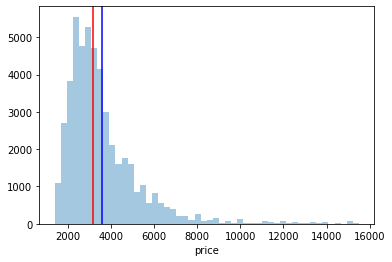

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['price'], kde=False);
# These next two vertical lines allow us to view the median and mean of our target
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red')
# The mean and median are different . It's important to remember that our model
# is used to predict new data, not describe old data.

Visualize a comparison of train data

In [0]:
import plotly.express as px
px.scatter(df, x='latitude', y='price', trendline='ols')

Just from the visualization , we can tell that any apartment between 40.7-40.8 is going to go for much more money than the apartments beyond those parameters!! Adding a line of best fit shows us a nearly horizontal line, meaning that there is no actual definitive correlation between this feature and this target.

##Using Scikitlearn to form a linear regression model for 1 feature

In [0]:
# Step 1: Import the appropriate estimator

from sklearn.linear_model import LinearRegression

# Step 2: Make a blank instance of the model (Class Instantiation)

model = LinearRegression()

In [0]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Step 3: Arrange the Features and Target using "_train"

features = ['latitude']
target = ['price']

x_train = df[features]
y_train = df[target]

x_train.shape, y_train.shape

((48818, 1), (48818, 1))

In [0]:
# Step 4: Fit the model

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Step 5: Apply the model to the new data

latitude1 = 40.7415
x_test = [[latitude1]]
# scikit expects multi dimensional input which is why we use double brackets

y_pred = model.predict(x_test)
y_pred

array([[3594.72432746]])

In [0]:
# With a Latitude of 40.7415, we can predict that the apartment
# will cost 3594 per month to rent

## Create a prediction function

In [0]:
def predict(latitude):
  y_pred = model.predict([[latitude]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  print(int(estimate), "is our estimated price for", float(latitude), "latitude location apartment.")
  return estimate

print(predict(40.6044))

3819 is our estimated price for 40.6044 latitude location apartment.
[3819.31358229]


In [0]:
print(predict(40.8100))

3482 is our estimated price for 40.81 latitude location apartment.
[3482.51160714]


In [0]:
print(predict(40.7120))

3643 is our estimated price for 40.712 latitude location apartment.
[3643.04951359]
